In [1]:
import makesens.tratamiento.tratamiento as mkt
import makesens.visualizacion.visualizacion as mkv
import pandas as pd
import numpy as np

In [2]:
Davis = mkt.loaddata_davis('../Data/Datos_Daves_09092020_11092020_.txt')
Eva1 = mkt.loaddata_eva('../Data/EVA1_05092020_12092020_.csv')
Eva2 = mkt.loaddata_eva('../Data/EVA2_05092020_12092020_.csv')
Eva3 = mkt.loaddata_eva('../Data/EVA3_05092020_12092020_.csv')

In [3]:
datastart = '2020-09-05 00:00:00'
dataend = '2020-09-10 23:00:00'
Davis,Eva1,Eva2,Eva3 = mkt.cutdata([Davis,Eva1,Eva2,Eva3],datastart,dataend)

### Calibration for temperature, LinearModel

In [4]:
all_data = pd.merge(Davis,Eva1,left_index=True,right_index=True)
all_data = all_data[['Temp_Out','Out_Hum','temperature','humidity']]
all_data.drop(all_data[all_data['temperature'] == float(np.nan) ].index)
all_data.temperature = mkt.rolling(all_data.temperature,3)
all_data.humidity = mkt.rolling(all_data.humidity,3)


In [5]:
rmse_t, coef_t, intercept_t, calib_t = mkt.LinearModel([all_data['Temp_Out'],all_data['temperature']],0.5)
rmse_h, coef_h, intercept_h, calib_h = mkt.LinearModel([all_data['Out_Hum'],all_data['humidity']],0.5)
print('RMSE_t:',rmse_t, 'COEF_t:',coef_t, 'Intercept_t',intercept_t)
print('RMSE_h:',rmse_h, 'COEF_h:',coef_h, 'Intercept_h',intercept_h)

RMSE_t: 0.4768209619720401 COEF_t: [0.94221228] Intercept_t 0.6226929525516773
RMSE_h: 1.9198912743834209 COEF_h: [0.93461172] Intercept_h 17.74966449834365


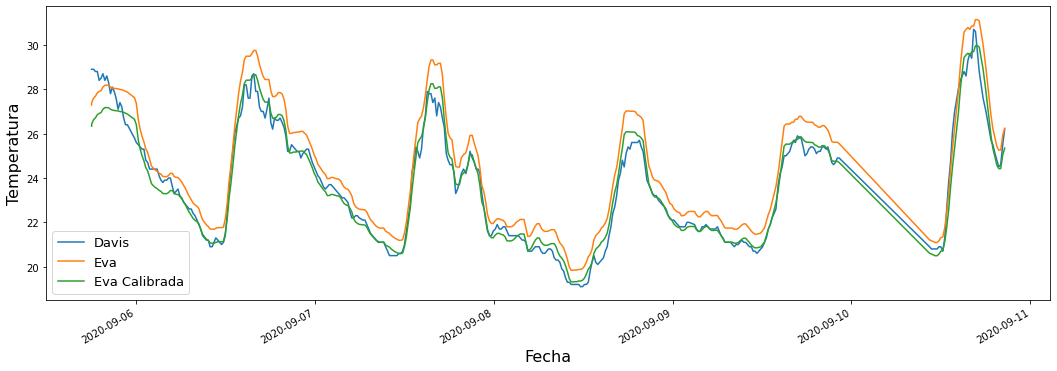

In [6]:
mkv.vizualize([all_data['Temp_Out'],all_data['temperature'],calib_t],['Davis','Eva', 'Eva Calibrada'],'Fecha','Temperatura',16,(18,6))

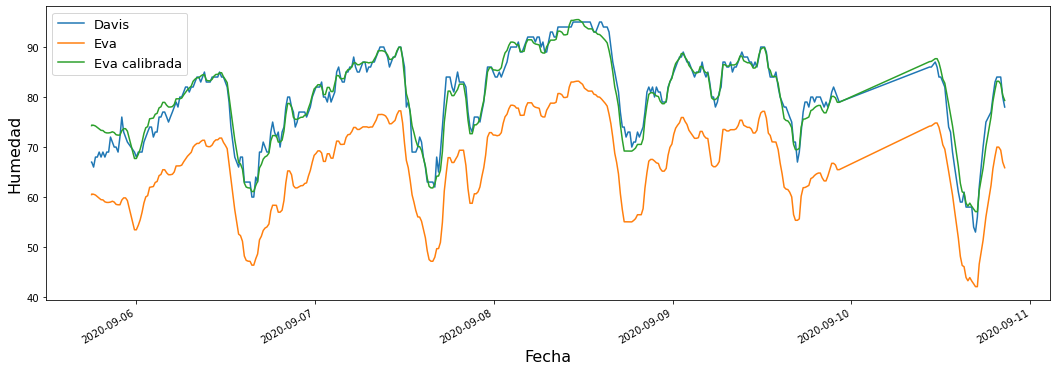

In [7]:
mkv.vizualize([all_data['Out_Hum'],all_data['humidity'],calib_h],['Davis','Eva', 'Eva calibrada'],'Fecha','Humedad',16,(18,6))